### PROBLEM DEFINITION

Business Understanding - To identify patterns and trends in customer behavior to gain insights to improve Nexus Bank efficiency and business.


In [62]:
# Import necessary libraries

# Data Analysis/ Preprocessing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings # used to remove any warning message that might come up
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset

df = pd.read_csv(r"C:\Users\user\Downloads\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### DATA INSPECTION

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
# Renaming columns for better understanding

df.rename(columns = {'marital':'marital status','default':'defaulter','balance':'account balance','housing':'housing loan',
                     'contact':'mode of contact','duration':'time in secs','pdays':'previously contacted days',
                     'previous':'no before campaign','poutcome':'outcome of campaign'},
          inplace = True)
df

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Creating age group

def age_group(x):
    if x <= 30:
        return '<=30 Youth'
    elif x <= 50:
        return '31-50 Adult'
    elif x <= 70:
        return '51-70 Old Adult'
    else:
        return '>70 Elder'
    
df['age group'] = df['age'].apply(age_group)
df

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit,age group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-70 Old Adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,31-50 Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-50 Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,31-50 Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-50 Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,51-70 Old Adult
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,>70 Elder
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,>70 Elder
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,51-70 Old Adult


In [6]:
def season_by_month(x): 
    
    if (x == "dec" or x == "jan" or x == "feb"):
        return "winter"
    elif(x == "mar" or x == "apr" or x == "may"):
        return "spring"
    elif(x =="jun" or x =="jul" or x == "aug"):
        return "summer"
    else:
        return "autumn"
    
    
df['season'] = df['month'].apply(season_by_month)
df

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit,age group,season
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-70 Old Adult,spring
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,31-50 Adult,spring
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-50 Adult,spring
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,31-50 Adult,spring
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-50 Adult,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,51-70 Old Adult,autumn
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,>70 Elder,autumn
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,>70 Elder,autumn
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,51-70 Old Adult,autumn


In [7]:
# Information about the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital status             45211 non-null  object
 3   education                  45211 non-null  object
 4   defaulter                  45211 non-null  object
 5   account balance            45211 non-null  int64 
 6   housing loan               45211 non-null  object
 7   loan                       45211 non-null  object
 8   mode of contact            45211 non-null  object
 9   day                        45211 non-null  int64 
 10  month                      45211 non-null  object
 11  time in secs               45211 non-null  int64 
 12  campaign                   45211 non-null  int64 
 13  previously contacted days  45211 non-null  int64 
 14  no bef

In [8]:
df.isnull().sum()

age                          0
job                          0
marital status               0
education                    0
defaulter                    0
account balance              0
housing loan                 0
loan                         0
mode of contact              0
day                          0
month                        0
time in secs                 0
campaign                     0
previously contacted days    0
no before campaign           0
outcome of campaign          0
deposit                      0
age group                    0
season                       0
dtype: int64

In [9]:
# Checking for duplicates

df[df.duplicated()]

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit,age group,season


In [10]:
# Print unique values in each column

for i in df.columns.tolist():
    print(i, '\n\n', df[i].unique())
    print('\n ------------------------------------------------------------------------------------------------------')

age 

 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 ------------------------------------------------------------------------------------------------------
job 

 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 ------------------------------------------------------------------------------------------------------
marital status 

 ['married' 'single' 'divorced']

 ------------------------------------------------------------------------------------------------------
education 

 ['tertiary' 'secondary' 'unknown' 'primary']

 ------------------------------------------------------------------------------------------------------
defaulter 

 ['no' 'yes']

 --------------------------------------------

In [11]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital status,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defaulter,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing loan,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode of contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


### EXPLORATORY DATA ANALYSIS

#### Univariate Analysis

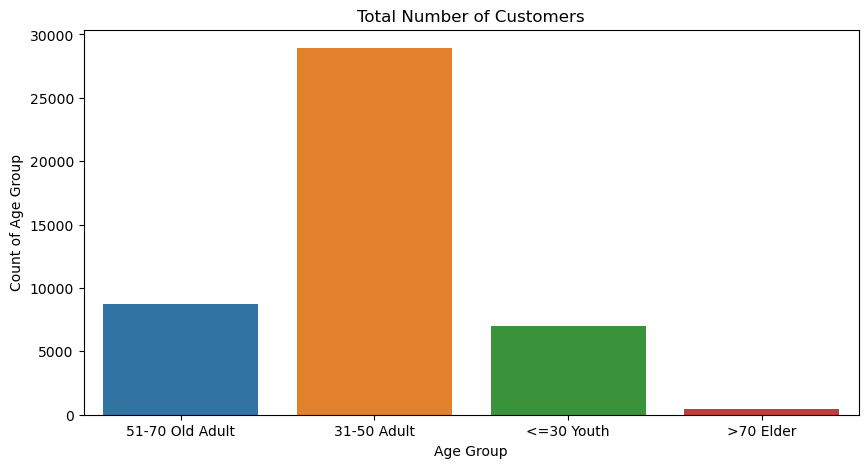

In [12]:
# visualizing the age bracket
plt.figure(figsize = (10,5))
sns.countplot(x = 'age group', data = df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Customers');

In [13]:
age_group = df['age group'].value_counts()
age_group

31-50 Adult        28926
51-70 Old Adult     8768
<=30 Youth          7030
>70 Elder            487
Name: age group, dtype: int64

It can be observed that people within 31-50 age group make up majority of Nexus customer and the least age group are people in the Elder category.

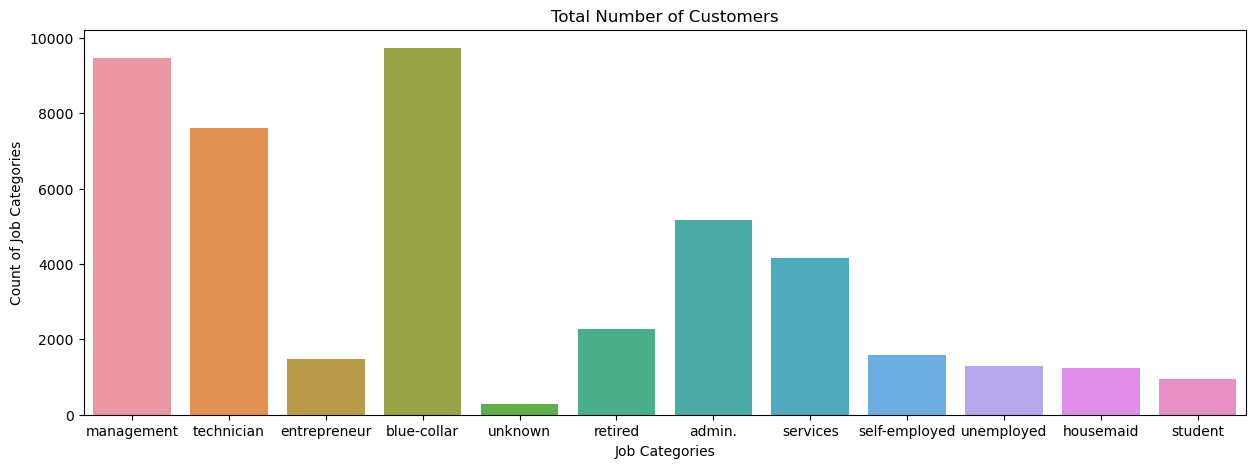

In [14]:
# visualizing the job category
plt.figure(figsize = (15,5))
sns.countplot(x = 'job', data = df)
plt.xlabel('Job Categories')
plt.ylabel('Count of Job Categories')
plt.title('Total Number of Customers');

In [15]:
job_cat = df['job'].value_counts()
job_cat

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

i observed that majority of Nexus customers have blue-collar jobs.

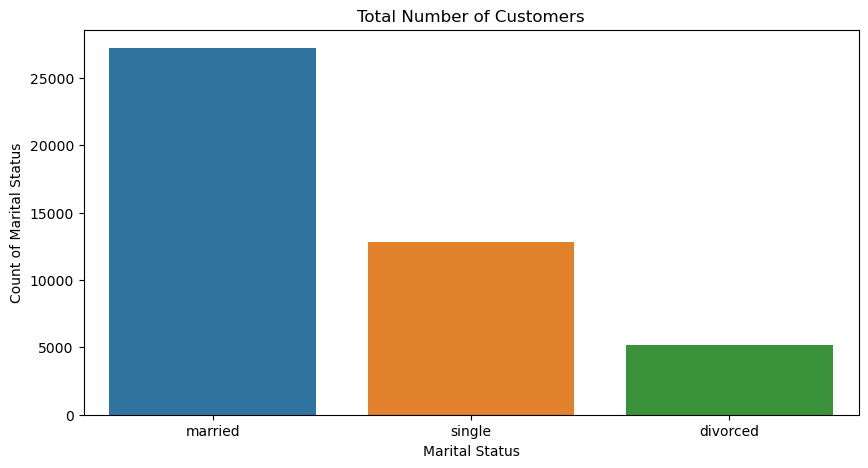

In [16]:
# visualizing Marital Status
plt.figure(figsize = (10,5))
sns.countplot(x = 'marital status', data = df)
plt.xlabel('Marital Status')
plt.ylabel('Count of Marital Status')
plt.title('Total Number of Customers');

In [17]:
marr = df['marital status'].value_counts()
marr

married     27214
single      12790
divorced     5207
Name: marital status, dtype: int64

It can be observed that most of the customers of Nexus are married.

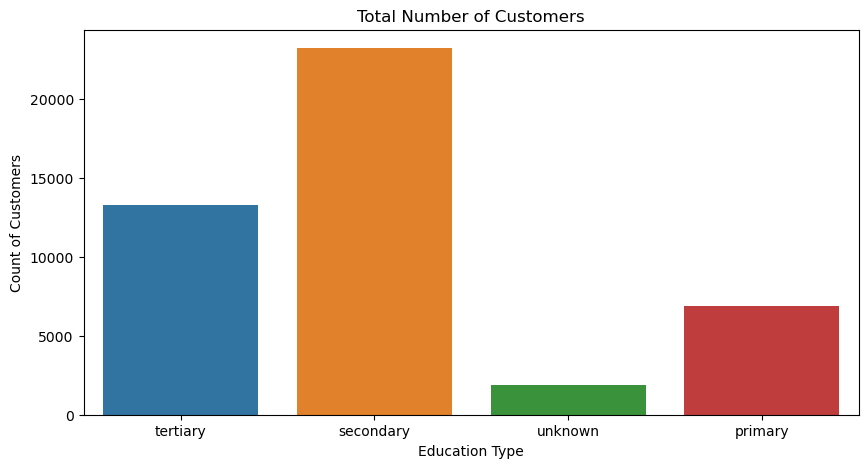

In [18]:
# visualizing Customer's Education

plt.figure(figsize = (10,5))
sns.countplot(x = 'education', data = df)
plt.xlabel('Education Type')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');

In [19]:
edu = df['education'].value_counts()
edu

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

It can be seen that highest level of education for customers of Nexus Bank is Secondary Level.

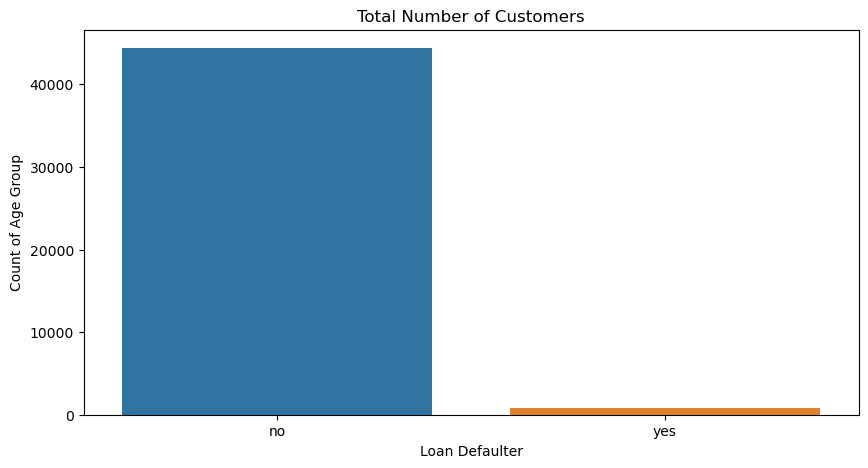

In [20]:
# visualizing the defaulter
plt.figure(figsize = (10,5))
sns.countplot(x = 'defaulter', data = df)
plt.xlabel('Loan Defaulter')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Customers');

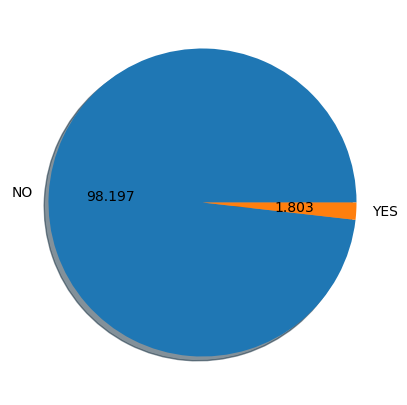

In [21]:
# visualizing the defaulter
plt.figure(figsize = (10,5))
plt.pie(df['defaulter'].value_counts(), autopct='%.3f',
       labels = ['NO','YES'],shadow= True);


In [22]:
default = df['defaulter'].value_counts()
default

no     44396
yes      815
Name: defaulter, dtype: int64

It can be seen that 98.2% of Nexus customers are not defaulters.

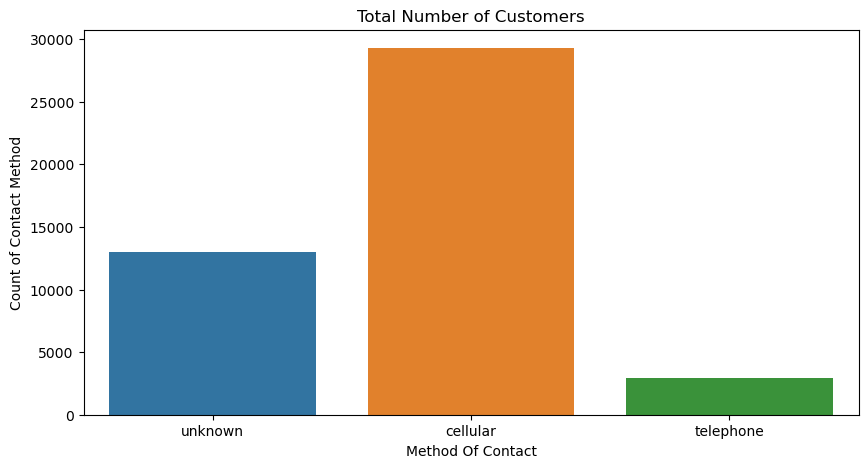

In [23]:
# visualizing the mode of contact
plt.figure(figsize = (10,5))
sns.countplot(x = 'mode of contact', data = df)
plt.xlabel('Method Of Contact')
plt.ylabel('Count of Contact Method')
plt.title('Total Number of Customers');

In [24]:
contact = df['mode of contact'].value_counts()
contact

cellular     29285
unknown      13020
telephone     2906
Name: mode of contact, dtype: int64

I observed that Cellular mode of contact had the highest customer reach.
I recommend that the Unknown mode of contact should be investigated to know the actual method used to contact the various 
customers, has it seem to have reached a significant number of customers.

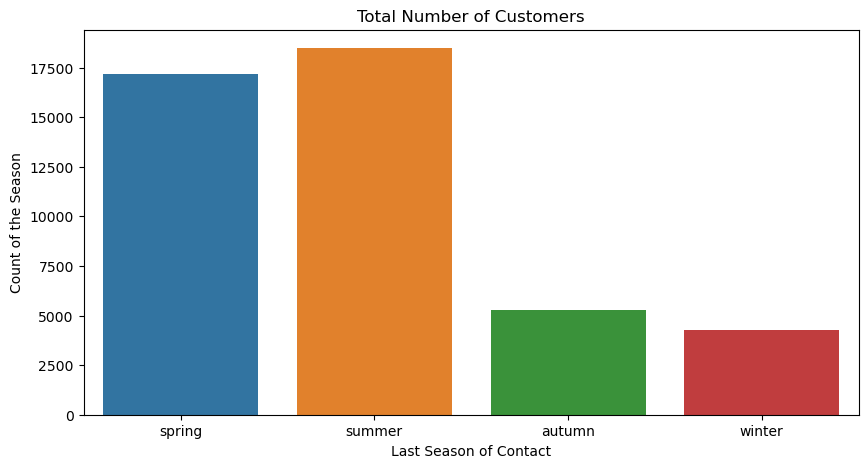

In [25]:
# visualizing the last month of contact
plt.figure(figsize = (10,5))
sns.countplot(x = 'season', data = df)
plt.xlabel('Last Season of Contact')
plt.ylabel('Count of the Season')
plt.title('Total Number of Customers');

In [26]:
month_con = df['season'].value_counts()
month_con

summer    18483
spring    17175
autumn     5287
winter     4266
Name: season, dtype: int64

I observed that contacts made to customers are at it's lowest during the winter period.

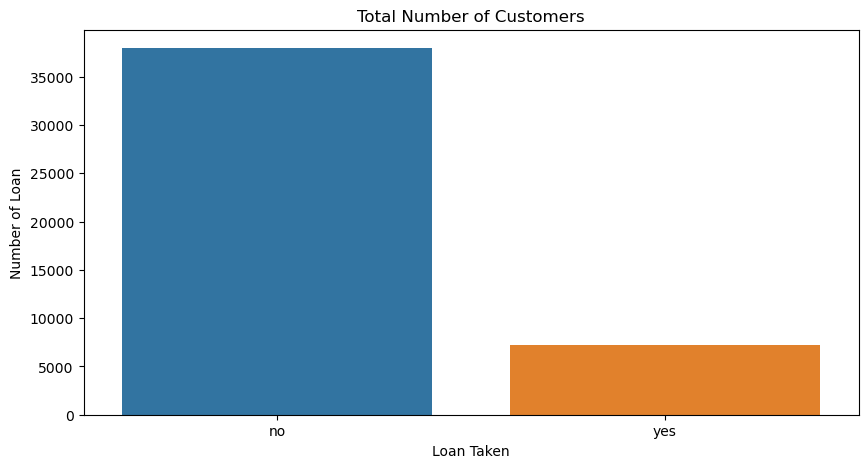

In [27]:
# visualizing the loan trends
plt.figure(figsize = (10,5))
sns.countplot(x = 'loan', data = df)
plt.xlabel('Loan Taken')
plt.ylabel('Number of Loan')
plt.title('Total Number of Customers');

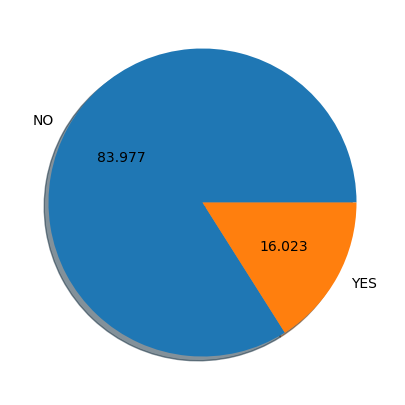

In [28]:
plt.figure(figsize = (10,5))
plt.pie(df['loan'].value_counts(), autopct='%.3f',
       labels = ['NO','YES'],shadow= True);

In [29]:
loan = df['loan'].value_counts()
loan

no     37967
yes     7244
Name: loan, dtype: int64

I observed that just 16% of Nexus bank customers have loans with the bank which is low compared to the total number of customers.

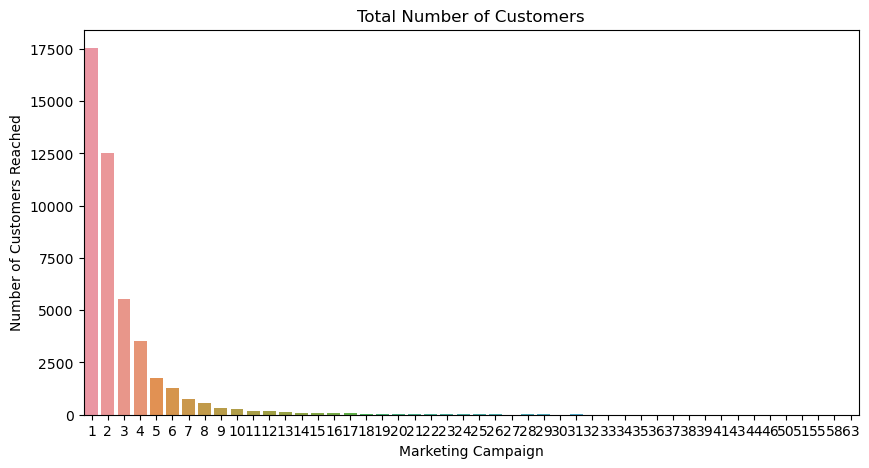

In [30]:
# visualizing the Campaign column
plt.figure(figsize = (10,5))
sns.countplot(x = 'campaign', data = df)
plt.xlabel('Marketing Campaign')
plt.ylabel('Number of Customers Reached')
plt.title('Total Number of Customers');

In [31]:
campaign = df['campaign'].value_counts()
campaign

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

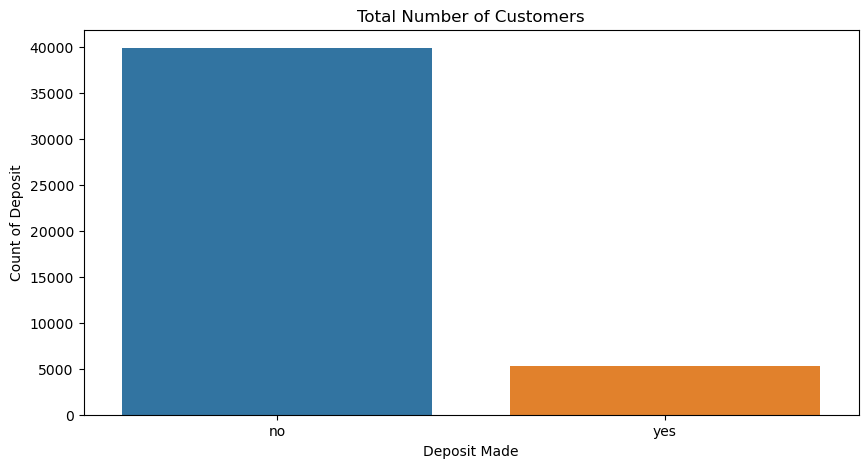

In [32]:
# visualizing the deposits made
plt.figure(figsize = (10,5))
sns.countplot(x = 'deposit', data = df)
plt.xlabel('Deposit Made')
plt.ylabel('Count of Deposit')
plt.title('Total Number of Customers');

In [33]:
depo = df['deposit'].value_counts()
depo

no     39922
yes     5289
Name: deposit, dtype: int64

The number of deposit made by customers of Nexus Bank compared to the total number of customers is insignificant.

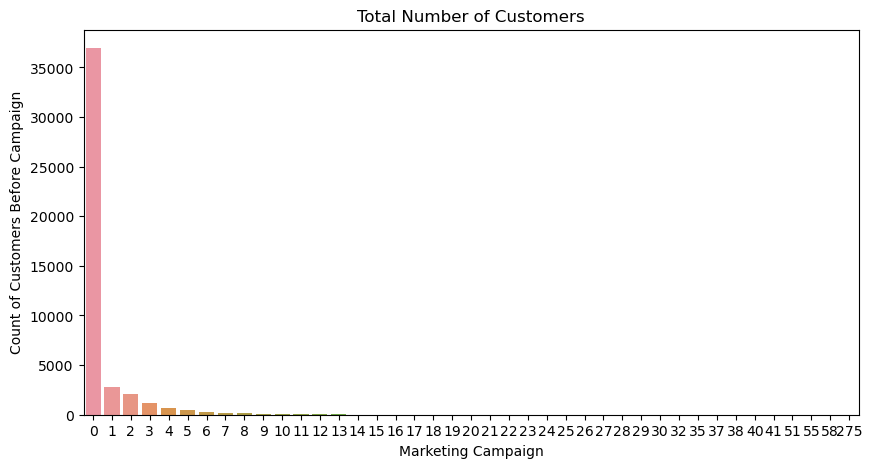

In [34]:
# visualizing the Number of Customers Before Campaign
plt.figure(figsize = (10,5))
sns.countplot(x = 'no before campaign', data = df)
plt.xlabel('Marketing Campaign')
plt.ylabel('Count of Customers Before Campaign')
plt.title('Total Number of Customers');

In [35]:
bef_camp = df['no before campaign'].value_counts()
bef_camp

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: no before campaign, dtype: int64

### BIVARIATE ANALYSIS

In [36]:
df

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit,age group,season
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-70 Old Adult,spring
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,31-50 Adult,spring
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-50 Adult,spring
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,31-50 Adult,spring
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-50 Adult,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,51-70 Old Adult,autumn
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,>70 Elder,autumn
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,>70 Elder,autumn
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,51-70 Old Adult,autumn


In [37]:
# What age group of customers made the most deposit

age_depo = df.groupby('age group')['deposit'].value_counts()
age_depo

age group        deposit
31-50 Adult      no         26095
                 yes         2831
51-70 Old Adult  no          7673
                 yes         1095
<=30 Youth       no          5885
                 yes         1145
>70 Elder        no           269
                 yes          218
Name: deposit, dtype: int64

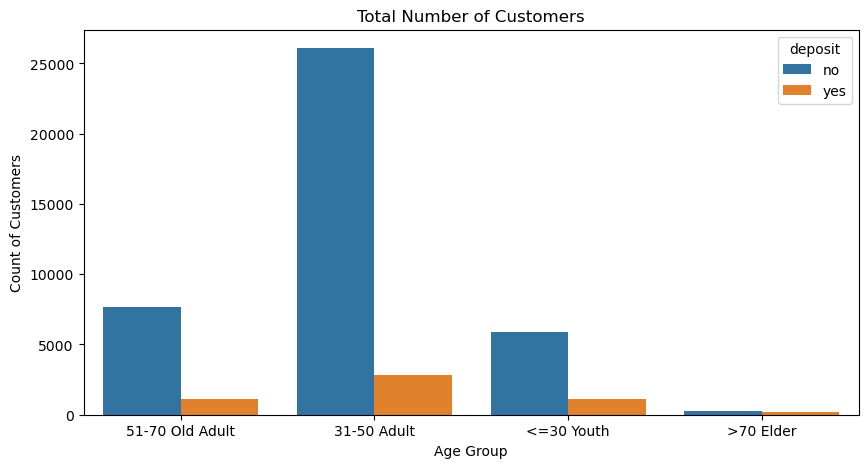

In [38]:
# Visualizing age_depo

plt.figure(figsize = (10,5))
sns.countplot(x = 'age group', data = df, hue = 'deposit')
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');

Customers in the 31-50 age bracket make up majority of the total number of customers of Nexus Bank with 28,926 customers.They made the most deposit but compared to their number is insignficant(2,831) and also the least deposit.

In [39]:
# What job of customer has the highest deposit?
 
job_depo = df.groupby('job')['deposit'].value_counts()
job_depo

job            deposit
admin.         no         4540
               yes         631
blue-collar    no         9024
               yes         708
entrepreneur   no         1364
               yes         123
housemaid      no         1131
               yes         109
management     no         8157
               yes        1301
retired        no         1748
               yes         516
self-employed  no         1392
               yes         187
services       no         3785
               yes         369
student        no          669
               yes         269
technician     no         6757
               yes         840
unemployed     no         1101
               yes         202
unknown        no          254
               yes          34
Name: deposit, dtype: int64

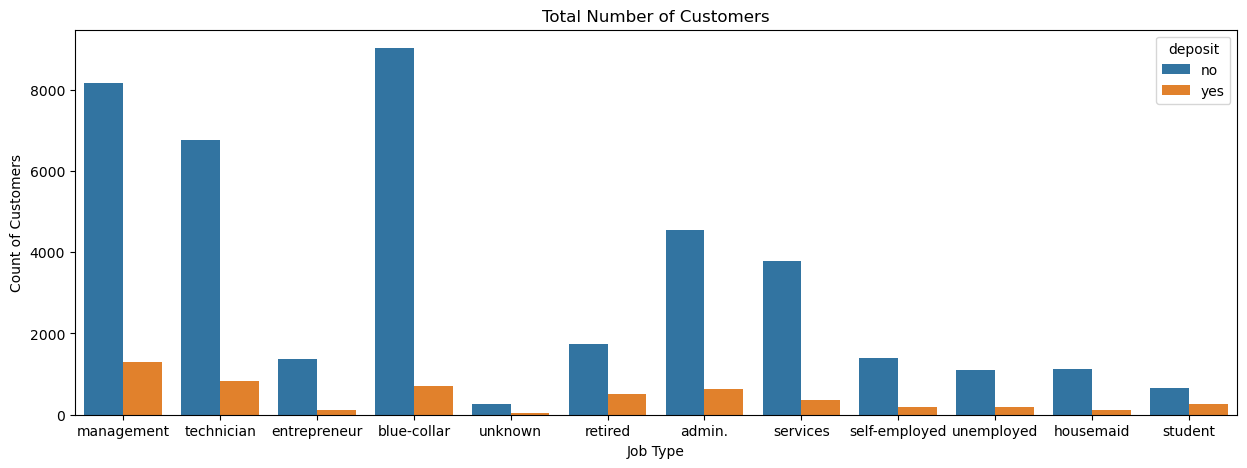

In [40]:
# Visualizing job_depo

plt.figure(figsize = (15,5))
sns.countplot(x = 'job', data = df, hue = 'deposit')
plt.xlabel('Job Type')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');

In [41]:
# What's the age group with the highest account balance?

age_acct = df.groupby('age group')['account balance'].sum().reset_index()
age_acct

,age group,account balance
0,31-50 Adult,37219316
1,51-70 Old Adult,15779603
2,<=30 Youth,7170268
3,>70 Elder,1420495


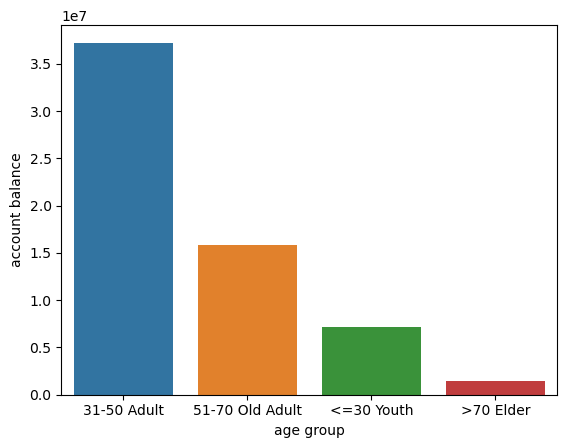

In [42]:
# Visualizing age_acct

sns.barplot(x = 'age group',y = 'account balance', data = age_acct);

In [43]:
# What level of education made the highest and the least deposit?

edu_depo = df.groupby('deposit')['education'].value_counts()
edu_depo

deposit  education
no       secondary    20752
         tertiary     11305
         primary       6260
         unknown       1605
yes      secondary     2450
         tertiary      1996
         primary        591
         unknown        252
Name: education, dtype: int64

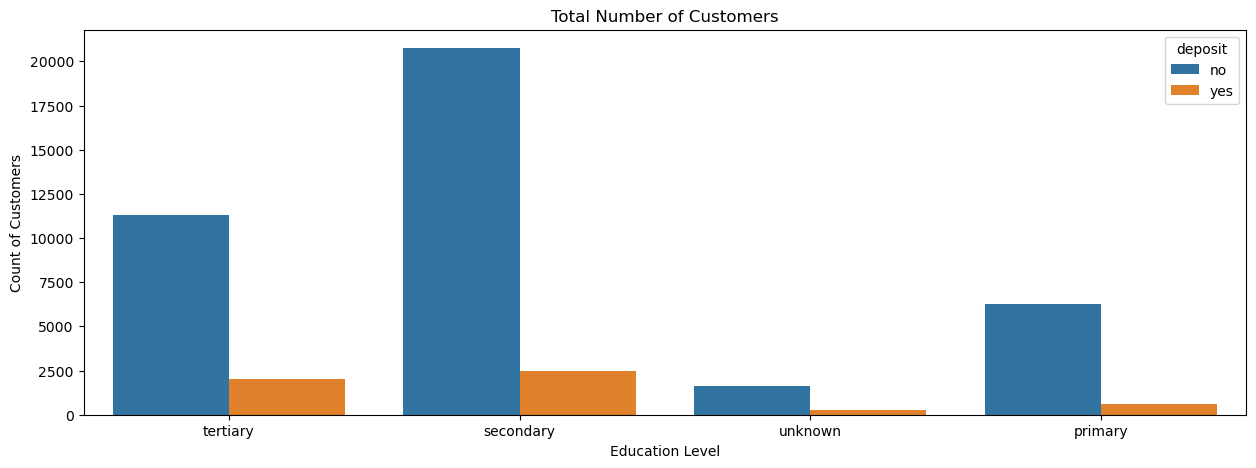

In [44]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'education', data = df, hue = 'deposit')
plt.xlabel('Education Level')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');

I observed that majority of Nexus customers secondary school degree holders and they hold the highest number of customers who haven't deposisted.

In [45]:
# What mode of contact has the highest deposit?

con_depo = df.groupby('deposit')['mode of contact'].value_counts()
con_depo

deposit  mode of contact
no       cellular           24916
         unknown            12490
         telephone           2516
yes      cellular            4369
         unknown              530
         telephone            390
Name: mode of contact, dtype: int64

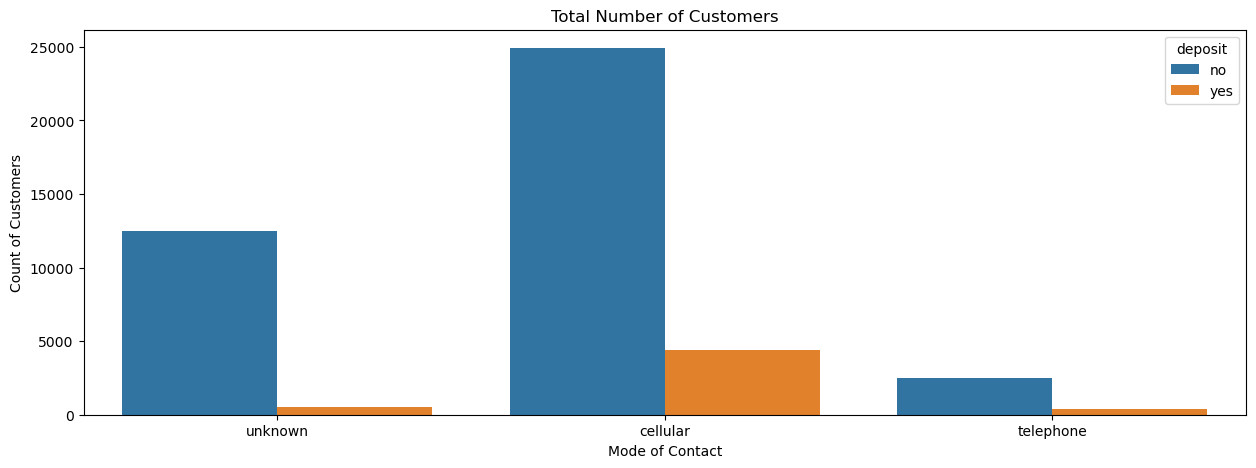

In [46]:
# Visualizing mode of contact against deposit

plt.figure(figsize = (15,5))
sns.countplot(x = 'mode of contact', data = df, hue = 'deposit')
plt.xlabel('Mode of Contact')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');

I observed that cellular mode of contact has the highest number of non-deposit of 24,916 out of 29,285, followed by unknown mode of contact.

In [47]:
bef_con = df.groupby('deposit')['previously contacted days'].value_counts()
bef_con

deposit  previously contacted days
no       -1                           33570
          370                            90
          182                            87
          364                            73
          350                            68
                                      ...  
yes       804                             1
          805                             1
          828                             1
          842                             1
          854                             1
Name: previously contacted days, Length: 914, dtype: int64

In [48]:
# Visualizing number before campaign and previously contacted days

# plt.figure(figsize = (15,5))
# sns.countplot(x = 'no before campaign', data = df, hue = 'previously contacted days')
# plt.xlabel('Before Campaign')
# plt.ylabel('Count of Customers')
# plt.title('Total Number of Customers');

### MULTIVARIATE ANALYSIS

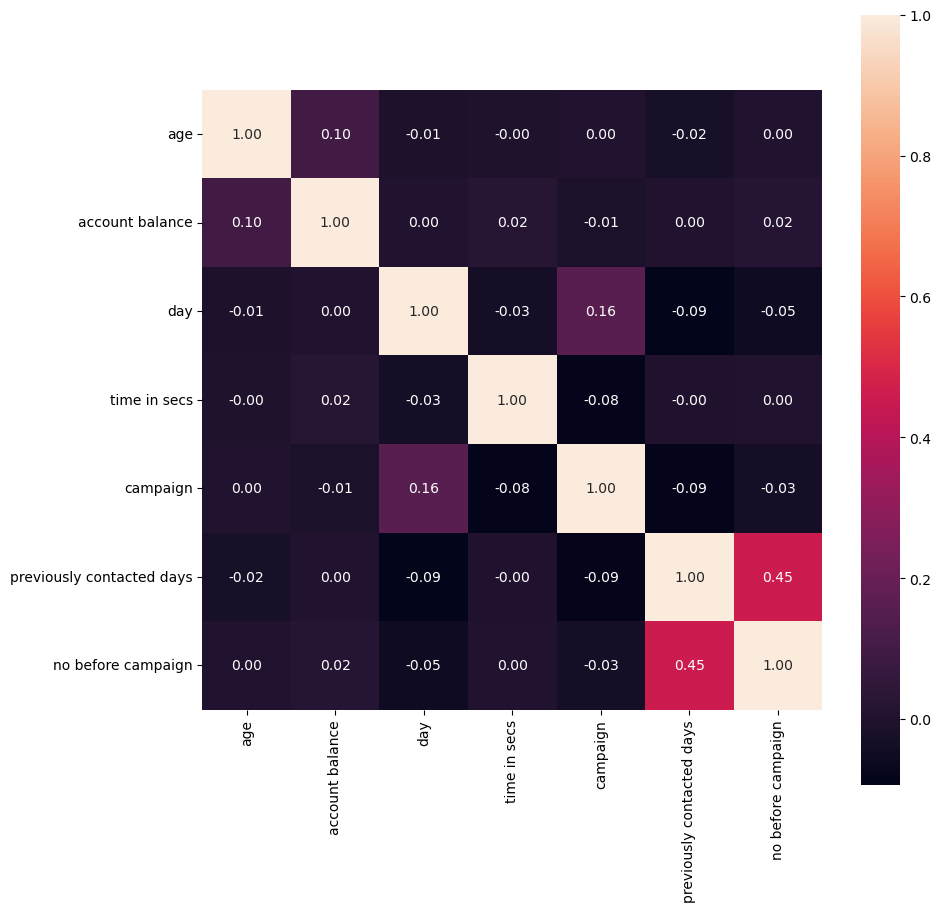

In [49]:
# Correlation between campaign and other features in the dataset

plt.figure(figsize = (10,10))

hm = sns.heatmap(df.corr(), cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size':10}) 

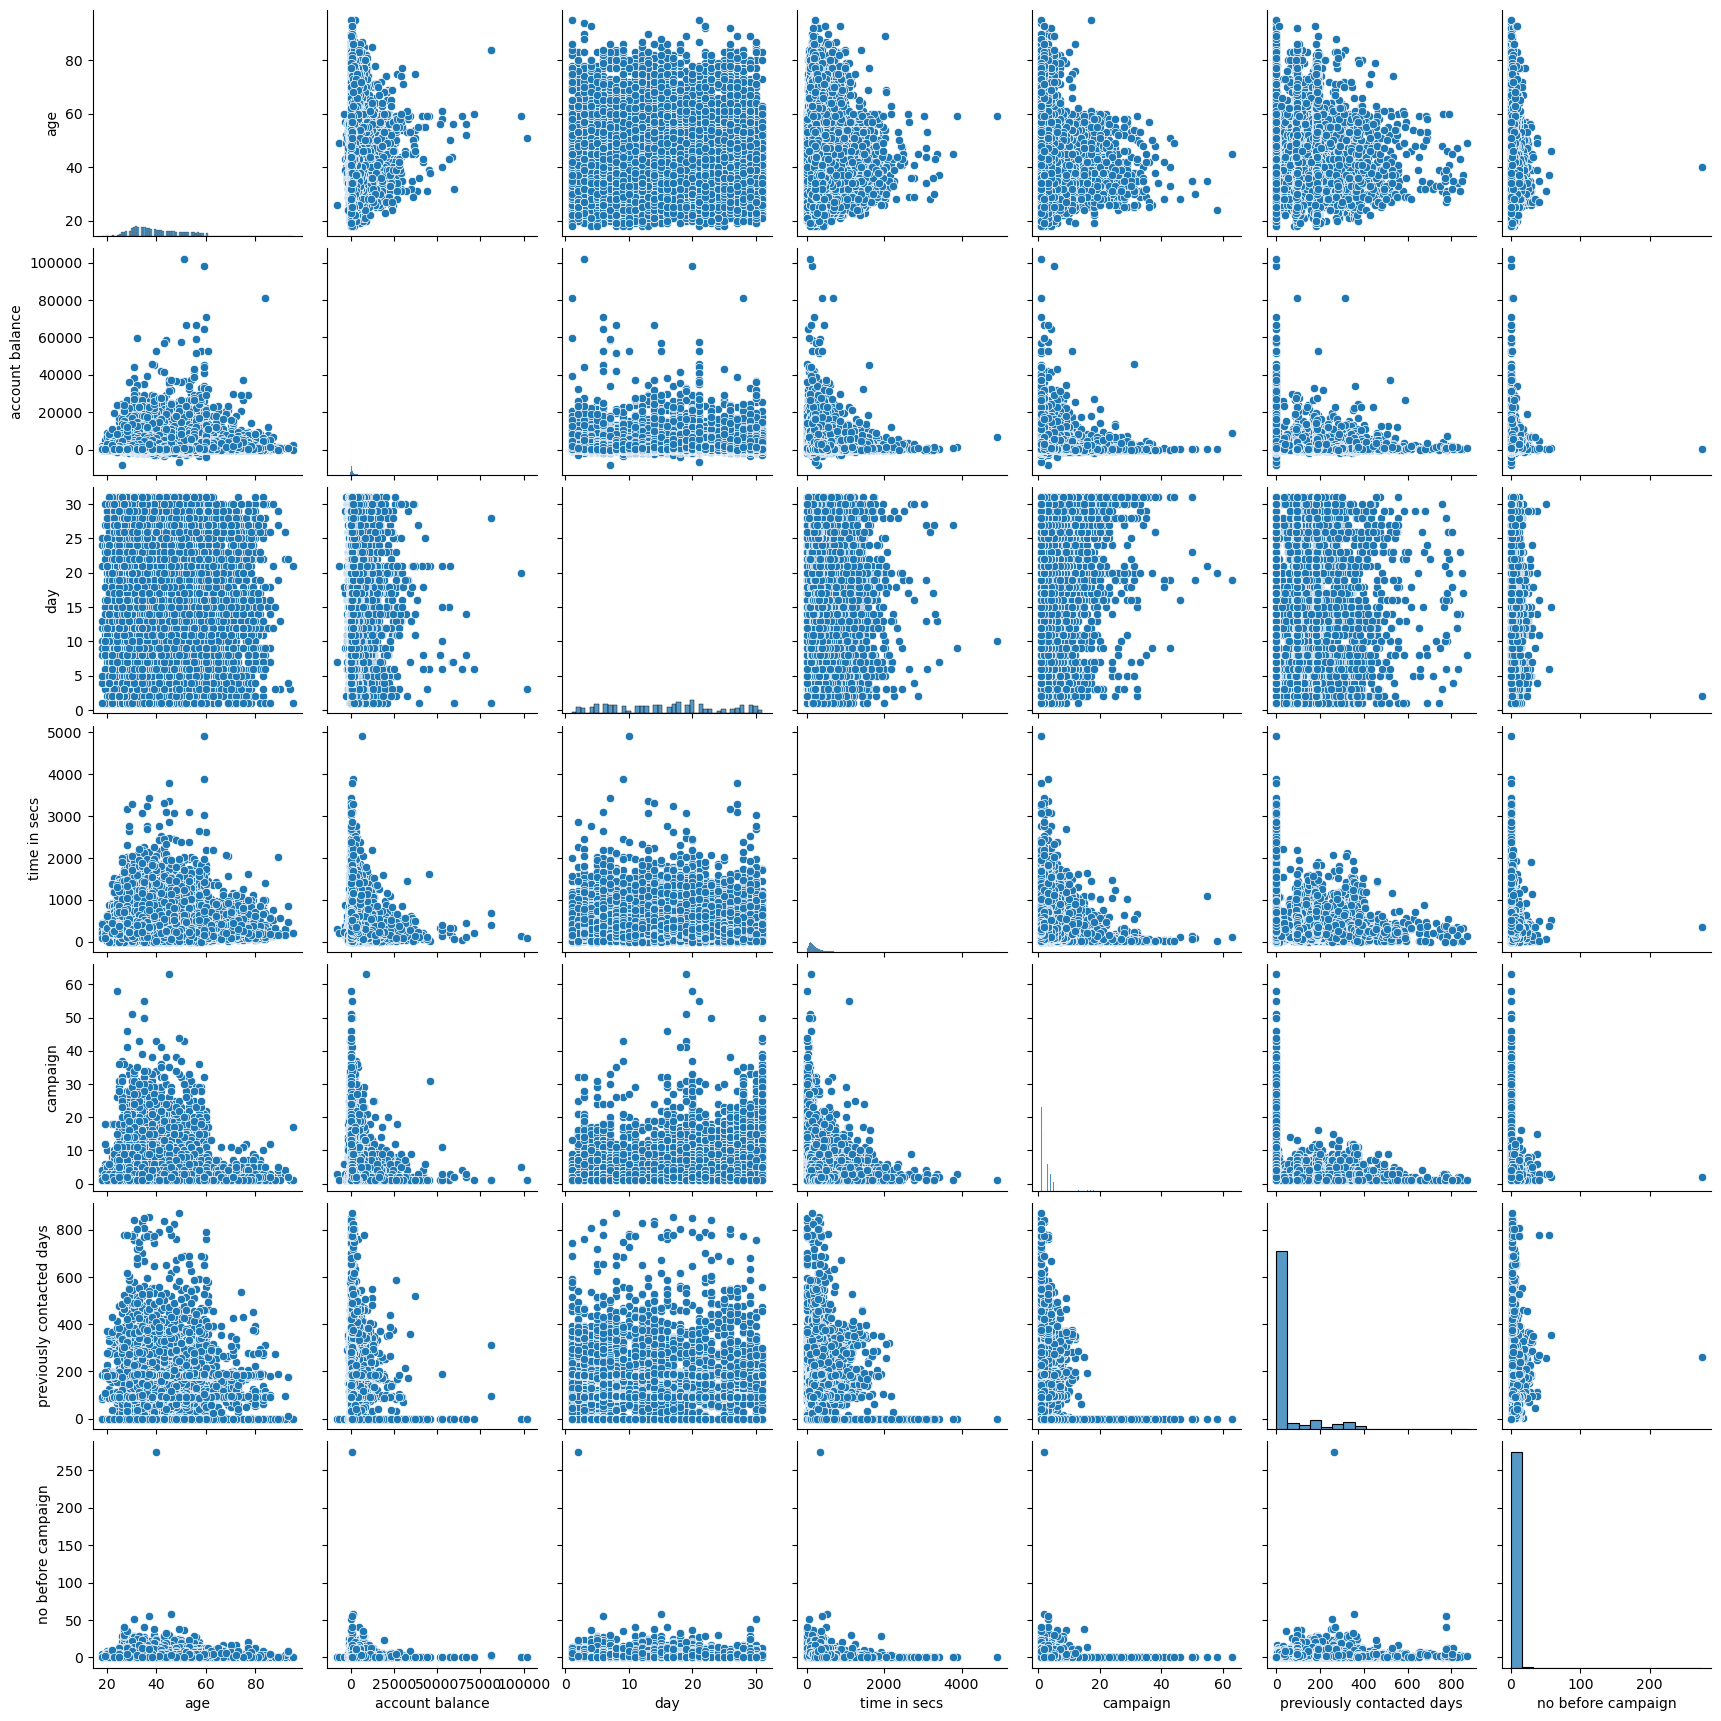

In [50]:
sns.pairplot(df);

### FEATURE ENGINEERING AND DATA PREPROCESSING

#### SUPERVISED MACHINE LEARNING

In [51]:
# Creating a copy of the dataframe excluding the columns created,the target and the label

df1 = df.copy()
df1

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit,age group,season
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-70 Old Adult,spring
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,31-50 Adult,spring
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-50 Adult,spring
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,31-50 Adult,spring
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-50 Adult,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,51-70 Old Adult,autumn
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,>70 Elder,autumn
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,>70 Elder,autumn
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,51-70 Old Adult,autumn


In [52]:
df1.columns

Index(['age', 'job', 'marital status', 'education', 'defaulter',
       'account balance', 'housing loan', 'loan', 'mode of contact', 'day',
       'month', 'time in secs', 'campaign', 'previously contacted days',
       'no before campaign', 'outcome of campaign', 'deposit', 'age group',
       'season'],
      dtype='object')

In [53]:
df1.drop(columns = ['age group','season'],axis = 1,inplace = True)
df1

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [54]:
# Converting Categorical Data of any column to Numerical Data

from sklearn.preprocessing import LabelEncoder

# label Encoding
encoder = LabelEncoder() # initializing

for i in df1.columns[1:]:
    if(df1[i].dtype == 'object'):
        df1[i] = encoder.fit_transform(df1[i])
    else:
        df1[i] = df1[i]
        
df1

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [55]:
# Selecting the predictor(independent) features

X = df1.drop('deposit',axis = 1)
X

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [56]:
y = df1['deposit']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int32

### TRAIN-TEST-SPLIT

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


#### FEATURE SCALING

In [58]:
# Checking and resolving outliers in the dataset

from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


In [59]:
display(X_train.head())
display(X_test.head())

,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign
3344,0.133333,-0.500000,0.0,-1.0,0.0,0.295806,0.0,0.0,1.0,-0.076923,0.4,-0.502326,-0.5,0.0,0.0,0.0
17965,0.666667,0.833333,0.0,-1.0,0.0,0.712288,0.0,0.0,0.0,1.076923,-0.2,0.413953,0.0,0.0,0.0,0.0
18299,0.200000,-0.666667,0.0,0.0,0.0,2.498160,-1.0,0.0,0.0,1.153846,-0.2,-0.232558,1.0,0.0,0.0,0.0
10221,-0.133333,0.000000,1.0,1.0,0.0,-0.416483,0.0,0.0,1.0,-0.384615,0.0,0.906977,4.5,0.0,0.0,0.0
32192,1.133333,-0.500000,0.0,-1.0,0.0,2.245033,-1.0,0.0,0.0,-0.076923,-1.2,0.390698,0.0,0.0,0.0,0.0


,age,job,marital status,education,defaulter,account balance,housing loan,loan,mode of contact,day,month,time in secs,campaign,previously contacted days,no before campaign,outcome of campaign
3776,0.066667,-0.500000,0.0,0.0,0.0,0.094276,0.0,0.0,1.0,0.000000,0.4,0.046083,-0.5,0.0,0.0,0.0
9928,0.533333,0.500000,1.0,0.0,0.0,2.386831,-1.0,0.0,1.0,-0.538462,0.0,-0.456221,0.0,0.0,0.0,0.0
33409,-0.933333,0.666667,1.0,1.0,0.0,0.062851,0.0,0.0,0.0,0.307692,-1.2,0.202765,-0.5,0.0,0.0,0.0
31885,0.200000,0.000000,0.0,1.0,0.0,0.986906,-1.0,0.0,0.0,-0.538462,-1.2,0.594470,-0.5,337.0,1.0,-3.0
15738,1.133333,0.000000,0.0,1.0,0.0,-0.177329,-1.0,1.0,0.0,0.384615,-0.2,-0.281106,0.0,0.0,0.0,0.0


In [60]:
print(X_train.shape)
print(X_test.shape)

(36168, 16)
(9043, 16)


### MODEL SELECTION

In [63]:
# Logistic Regression Algorithm

lr = LogisticRegression() #initialization

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)

# Evaluation Metrics
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:',precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1 Score:', f1_score(y_test, ly_pred))
print('AUC_ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8885325666261197
Precision: 0.6089238845144357
Recall: 0.21264894592117323
F1 Score: 0.31521739130434784
AUC_ROC: 0.5969557606869448


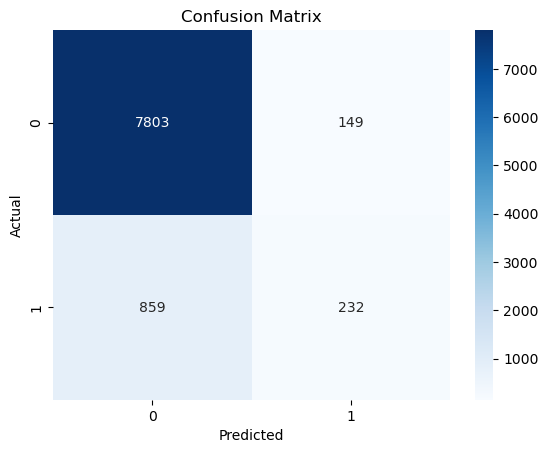

In [77]:
# Creating Confusion Metrics

lcm = confusion_matrix(y_test, ly_pred)

# Visualizing the confusion metrics
sns.heatmap(lcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [64]:
# Random Forest Classifier/ Algorithm

rfc = RandomForestClassifier() #initialization

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:',precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1 Score:', f1_score(y_test, rfy_pred))
print('AUC_ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy: 0.9013601680858122
Precision: 0.639943741209564
Recall: 0.41704857928505956
F1 Score: 0.5049944506104329
AUC_ROC: 0.6924277101656686


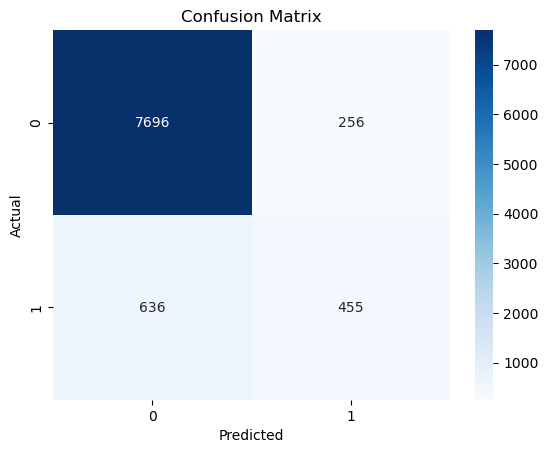

In [79]:
# Creating Confusion Metrics

rfm = confusion_matrix(y_test, rfy_pred)

# Visualizing the confusion metrics
sns.heatmap(rfm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [65]:
#KNeighborsClassifier/ Algorithm

knc = KNeighborsClassifier() #initialization

knc.fit(X_train, y_train)

kny_pred = knc.predict(X_test)

# Evaluation Metrics
print('KNeighbors')
print('Accuracy:', accuracy_score(y_test, kny_pred))
print('Precision:',precision_score(y_test, kny_pred))
print('Recall:', recall_score(y_test, kny_pred))
print('F1 Score:', f1_score(y_test, kny_pred))
print('AUC_ROC:', roc_auc_score(y_test, kny_pred))

KNeighbors
Accuracy: 0.8920712153046555
Precision: 0.5914149443561209
Recall: 0.34097158570119157
F1 Score: 0.4325581395348837
AUC_ROC: 0.6543263361101531


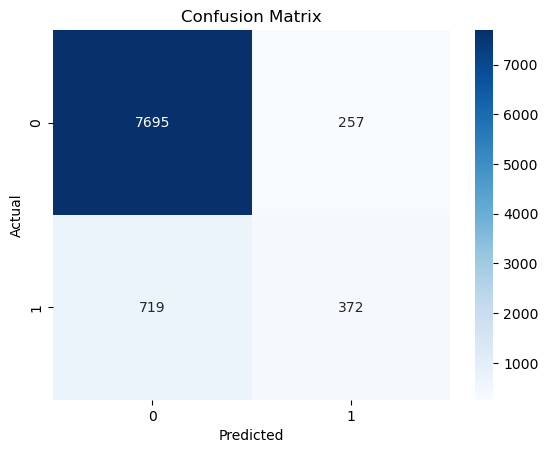

In [80]:
# Creating Confusion Metrics

knm = confusion_matrix(y_test, kny_pred)

# Visualizing the confusion metrics
sns.heatmap(knm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [66]:
DecisionTreeClassifier

# DecisionTreeClassifier/ Algorithm

dtc = KNeighborsClassifier() #initialization

dtc.fit(X_train, y_train)

dty_pred = knc.predict(X_test)

# Evaluation Metrics
print('DecisionTree')
print('Accuracy:', accuracy_score(y_test, dty_pred))
print('Precision:',precision_score(y_test, dty_pred))
print('Recall:', recall_score(y_test, dty_pred))
print('F1 Score:', f1_score(y_test, dty_pred))
print('AUC_ROC:', roc_auc_score(y_test, dty_pred))

DecisionTree
Accuracy: 0.8920712153046555
Precision: 0.5914149443561209
Recall: 0.34097158570119157
F1 Score: 0.4325581395348837
AUC_ROC: 0.6543263361101531


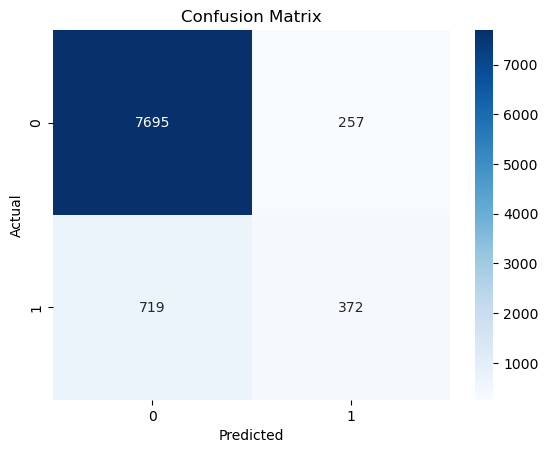

In [81]:
# Creating Confusion Metrics

dtm = confusion_matrix(y_test, dty_pred)

# Visualizing the confusion metrics
sns.heatmap(dtm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

The best model/ algorithm is the Random Forest Algorithm.

### UNSUPERVISED MACHINE LEARNING

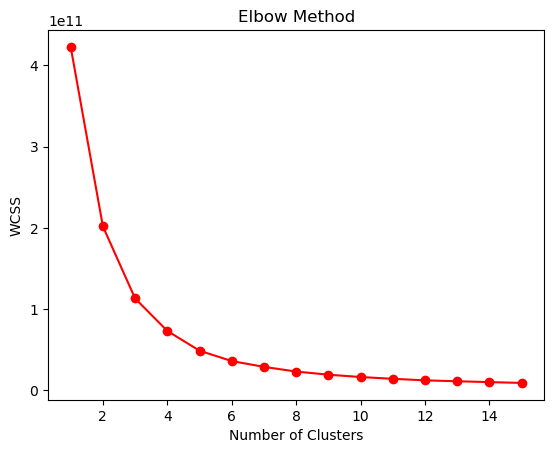

In [83]:
# Determine the Optimal Number of Clusters

wcss = []  # within cluster sum of squares(wcss)
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss, color = 'red', marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();

In [74]:
# Fit K-Means clustering model

kmeans = KMeans(n_clusters =5 , init = 'k-means++', random_state = 42)
kmeans.fit(df1)

# Add cluster labels to dataframe(df)
df1['Cluster'] = kmeans.labels_

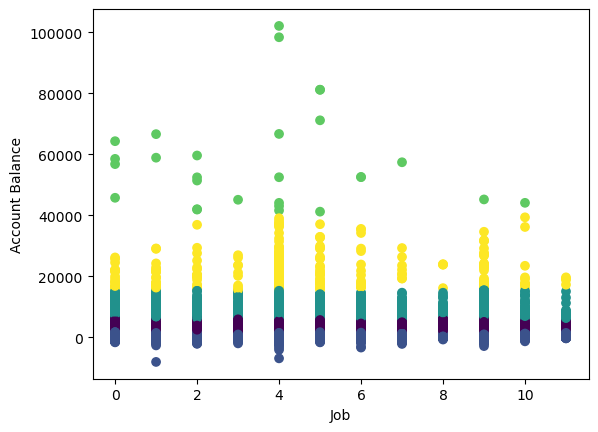

0.4175604806884555

In [90]:
# Visualize cluster results

plt.scatter(df1['job'], df['account balance'],c = df1['Cluster'], label = 'Centroids')
plt.xlabel('Job')
plt.ylabel('Account Balance')
plt.show();

# Calculate silhoutte score

from sklearn.metrics import silhouette_score

silhouette_score(df1, kmeans.labels_)

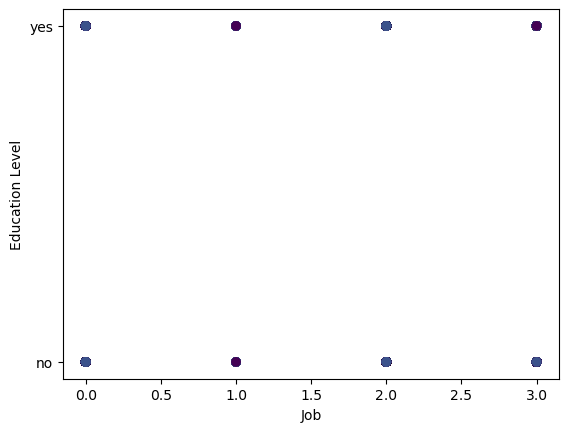

0.4175604806884555

In [94]:
# Visualize cluster results

plt.scatter(df1['education'], df[''],c = df1['Cluster'], label = 'Centroids')
plt.xlabel('Job')
plt.ylabel('Education Level')
plt.show();

# Calculate silhoutte score

from sklearn.metrics import silhouette_score

silhouette_score(df1, kmeans.labels_)

### CONCLUSION AND RECOMMENDATIONS

The business problem is to segment Nexus customers based on their demographic and behavior, in order to help them have a better understanding of their customers. Their goal is to increase deposits and know the likelihood of subscription to their term deposit through customer behaviours and pattern.

After careful analysis the following was observed:
1. Customers in the 31-50 age bracket made up majority of the total number of customers of Nexus Bank with 28,926 customers.They made the most deposit but compared to their numbers the deposits made was insignficant(2,831).
2. People within 31-50 age group made up majority of Nexus customer base and the least age group were people in the Elder category(>70).
3. Majority of Nexus customers have blue-collar jobs.
4. 16% of Nexus bank customers have loans with the bank which is low compared to the total number of customers.
5. 98.2% of Nexus customers are not defaulters.
6. The number of deposit made by customers of Nexus Bank compared to the total number of customers is insignificant.
7. Contacts made to customers are at it's lowest during the winter period.


I recommend that more follow up should be done after every campaign especially during the winter period.
More awareness should be created on the loans available, this is because the number of customers without loan is significantly high.Other job categories should be also sort after as majority of the customers have blue collar jobs.